<a href="https://colab.research.google.com/github/pouyaabbassi/-/blob/main/p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import scipy.io
import h5py
import numpy as np
import cv2
from tqdm import tqdm

# ŸÖÿ≥€åÿ± Ÿàÿ±ŸàÿØ€å: €¥ ŸæŸàÿ¥Ÿá ÿØÿ± ⁄ØŸà⁄ØŸÑ ÿØÿ±ÿß€åŸà
base_path = "/content/drive/MyDrive/MRI_Datasets/Figshare/"

# ŸÖÿ≥€åÿ± ÿÆÿ±Ÿàÿ¨€å: ÿ™ÿµÿßŸà€åÿ± ÿØÿ≥ÿ™Ÿá‚Äåÿ®ŸÜÿØ€å‚Äåÿ¥ÿØŸá ÿØÿ± ⁄ØŸà⁄ØŸÑ ÿØÿ±ÿß€åŸà
output_base = "/content/drive/MyDrive/figshare-sorted"

# ÿØ€å⁄©ÿ¥ŸÜÿ±€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÑ€åÿ®ŸÑ
classes = {1: "meningioma", 2: "glioma", 3: "pituitary"}

# ÿ≥ÿßÿÆÿ™ ŸæŸàÿ¥Ÿá‚ÄåŸáÿß€å ÿÆÿ±Ÿàÿ¨€å ÿß⁄Øÿ± Ÿàÿ¨ŸàÿØ ŸÜÿØÿßÿ±ŸÜÿØ
os.makedirs(output_base, exist_ok=True)
for class_name in classes.values():
    os.makedirs(os.path.join(output_base, class_name), exist_ok=True)

# ÿ™ÿßÿ®ÿπ ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å Ÿà ÿ∞ÿÆ€åÿ±Ÿá ÿ™ÿµŸà€åÿ±
def normalize_and_save(image, save_path):
    norm_img = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    norm_img = norm_img.astype('uint8')
    cv2.imwrite(save_path, norm_img)

# ÿ™ÿßÿ®ÿπ ÿÆŸàÿßŸÜÿØŸÜ ŸÅÿß€åŸÑ .mat ÿ®ÿß Ÿæÿ¥ÿ™€åÿ®ÿßŸÜ€å ÿßÿ≤ Ÿáÿ± ÿØŸà ŸÅÿ±ŸÖÿ™
def process_mat_file(filepath):
    try:
        data = scipy.io.loadmat(filepath)
        label = int(data["cjdata"]["label"][0][0])
        image = data["cjdata"]["image"]
    except NotImplementedError:
        with h5py.File(filepath, 'r') as f:
            label = int(np.array(f['cjdata']['label'])[0][0])
            image = np.array(f['cjdata']['image']).T  # h5py ŸÜ€åÿßÿ≤ ÿ®Ÿá transpose ÿØÿßÿ±ÿØ
    return label, image

# Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ™ŸÖÿßŸÖ ŸÅÿß€åŸÑ‚ÄåŸáÿß€å ŸÖŸàÿ¨ŸàÿØ ÿØÿ± ÿ≤€åÿ±ŸæŸàÿ¥Ÿá‚ÄåŸáÿß
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if not os.path.isdir(folder_path):
        continue

    print(f"üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: {folder}")
    for file in tqdm(os.listdir(folder_path)):
        if file.endswith(".mat"):
            file_path = os.path.join(folder_path, file)
            try:
                label, image = process_mat_file(file_path)
                class_name = classes[label]
                save_path = os.path.join(output_base, class_name, file.replace(".mat", ".png"))
                normalize_and_save(image, save_path)
            except Exception as e:
                print(f"‚ùå ÿÆÿ∑ÿß ÿØÿ± ŸÅÿß€åŸÑ {file}: {e}")


üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: brainTumorDataPublic_767-1532.zip (Unzipped Files)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 766/766 [00:31<00:00, 24.16it/s]


üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: brainTumorDataPublic_1533-2298.zip (Unzipped Files)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 766/766 [00:31<00:00, 24.39it/s]


üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: brainTumorDataPublic_2299-3064.zip (Unzipped Files)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 766/766 [00:32<00:00, 23.91it/s]


üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: brainTumorDataPublic_1-766.zip (Unzipped Files)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 764/764 [00:36<00:00, 21.21it/s]


In [ ]:
import os
import cv2
import numpy as np
import random
from glob import glob
from tqdm import tqdm
from skimage.util import random_noise

# ŸÖÿ≥€åÿ± ÿ™ÿµÿßŸà€åÿ± ÿØÿ≥ÿ™Ÿá‚Äåÿ®ŸÜÿØ€å‚Äåÿ¥ÿØŸá (ÿÆÿ±Ÿàÿ¨€å ŸÖÿ±ÿ≠ŸÑŸá ŸÇÿ®ŸÑ)
input_base = "/content/drive/MyDrive/figshare-sorted/"

# ŸÖÿ≥€åÿ±Ÿáÿß€å ÿ∞ÿÆ€åÿ±Ÿá ŸÜŸáÿß€å€å ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿ∫€åÿ± ŸÅÿ¥ÿ±ÿØŸá
output_X_path = "/content/drive/MyDrive/figshare_X.npy"
output_y_path = "/content/drive/MyDrive/figshare_y.npy"

# ÿßŸÜÿØÿßÿ≤Ÿá ŸáÿØŸÅ ÿ®ÿ±ÿß€å ÿ™ÿµÿßŸà€åÿ± (ŸÖÿ∑ÿßÿ®ŸÇ ŸÖÿØŸÑ CNN ŸÖŸÇÿßŸÑŸá)
target_size = (224, 224)

# ÿ¢ŸÖÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß
X = []
y = []

# ŸÜ⁄Øÿßÿ¥ÿ™ ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß ÿ®Ÿá ÿπÿØÿØ
label_map = {"meningioma": 0, "glioma": 1, "pituitary": 2}

# üîÅ ÿÆŸàÿßŸÜÿØŸÜ Ÿà Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ™ÿµÿßŸà€åÿ±
for label_name in os.listdir(input_base):
    label_path = os.path.join(input_base, label_name)
    if not os.path.isdir(label_path):
        continue

    label = label_map[label_name]
    image_paths = glob(os.path.join(label_path, "*.png"))

    for img_path in tqdm(image_paths, desc=label_name):
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, target_size)

            # ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿ®Ÿá ÿ®ÿßÿ≤Ÿá 0 ÿ™ÿß 1
            img = img / 255.0

            # ⁄©ÿßŸáÿ¥ ŸÜŸà€åÿ≤ (ÿ®ÿß Median Filter)
            img = cv2.medianBlur((img * 255).astype('uint8'), 3) / 255.0

            # ÿßŸÅÿ≤ŸàŸÜŸá‚Äåÿ≥ÿßÿ≤€å (€å⁄©€å ÿßÿ≤ ÿ≠ÿßŸÑÿ™‚ÄåŸáÿß€å: ⁄Üÿ±ÿÆÿ¥ÿå Ÿàÿßÿ±ŸàŸÜŸá‚Äåÿ≥ÿßÿ≤€åÿå ŸÜŸà€åÿ≤)
            aug_imgs = [img]
            flipped = cv2.flip(img, 1)  # ÿßŸÅŸÇ€å
            noisy = random_noise(img, mode='gaussian', var=0.005)
            rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

            aug_imgs.extend([flipped, noisy, rotated])

            for aug in aug_imgs:
                X.append(aug.astype(np.float32))
                y.append(label)

        except Exception as e:
            print(f"‚ùå ÿÆÿ∑ÿß ÿØÿ± ŸÅÿß€åŸÑ {img_path}: {e}")

# üîÄ ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá NumPy array Ÿà ÿØÿ±ŸáŸÖ‚Äåÿ±€åÿ≤€å
X = np.array(X).reshape(-1, 224, 224, 1)
y = np.array(y)

print(f"‚úÖ ÿ™ÿπÿØÿßÿØ ŸÜŸáÿß€å€å ÿ™ÿµÿßŸà€åÿ±: {X.shape[0]}")
print(f"üìè ÿ¥⁄©ŸÑ ÿ™ÿµÿßŸà€åÿ±: {X.shape[1:]}")
print(f"üî¢ ÿ™ÿπÿØÿßÿØ ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß: {y.shape[0]}")

# ÿ∞ÿÆ€åÿ±Ÿá ÿ®Ÿá ÿµŸàÿ±ÿ™ ŸÅÿß€åŸÑ‚ÄåŸáÿß€å NumPy ÿ∫€åÿ± ŸÅÿ¥ÿ±ÿØŸá
np.save(output_X_path, X)
np.save(output_y_path, y)

print(f"üíæ ÿ™ÿµÿßŸà€åÿ± ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØ: {output_X_path}")
print(f"üíæ ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØ: {output_y_path}")


pituitary: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 930/930 [00:21<00:00, 42.76it/s]


‚úÖ ÿ™ÿπÿØÿßÿØ ŸÜŸáÿß€å€å ÿ™ÿµÿßŸà€åÿ±: 12248
üìè ÿ¥⁄©ŸÑ ÿ™ÿµÿßŸà€åÿ±: (224, 224, 1)
üî¢ ÿ™ÿπÿØÿßÿØ ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß: 12248
üíæ ÿ™ÿµÿßŸà€åÿ± ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØ: /content/drive/MyDrive/figshare_X.npy
üíæ ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØ: /content/drive/MyDrive/figshare_y.npy


In [ ]:
import os
import scipy.io
import h5py
import numpy as np
import cv2
from tqdm import tqdm

# ŸÖÿ≥€åÿ± Ÿàÿ±ŸàÿØ€å: €¥ ŸæŸàÿ¥Ÿá ÿØÿ± ⁄ØŸà⁄ØŸÑ ÿØÿ±ÿß€åŸà
base_path = "/content/drive/MyDrive/MRI_Datasets/Figshare/"

# ŸÖÿ≥€åÿ± ÿÆÿ±Ÿàÿ¨€å: ŸÅÿß€åŸÑ‚ÄåŸáÿß€å numpy ÿØÿ± ⁄ØŸà⁄ØŸÑ ÿØÿ±ÿß€åŸà
output_npy_path = "/content/drive/MyDrive/figshare-numpy"
os.makedirs(output_npy_path, exist_ok=True)

# ÿØ€å⁄©ÿ¥ŸÜÿ±€å ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ŸÑ€åÿ®ŸÑ
classes = {1: "meningioma", 2: "glioma", 3: "pituitary"}

# ÿßŸÜÿØÿßÿ≤Ÿá ŸáÿØŸÅ ÿ™ÿµÿßŸà€åÿ±
target_size = (224, 224)

# ŸÑ€åÿ≥ÿ™‚ÄåŸáÿß€å ÿØÿßÿØŸá Ÿà ŸÑ€åÿ®ŸÑ
X = []
y = []

# ÿ™ÿßÿ®ÿπ ÿÆŸàÿßŸÜÿØŸÜ ŸÅÿß€åŸÑ .mat ÿ®ÿß Ÿæÿ¥ÿ™€åÿ®ÿßŸÜ€å ÿßÿ≤ Ÿáÿ± ÿØŸà ŸÅÿ±ŸÖÿ™
def process_mat_file(filepath):
    try:
        data = scipy.io.loadmat(filepath)
        label = int(data["cjdata"]["label"][0][0])
        image = data["cjdata"]["image"]
    except NotImplementedError:
        with h5py.File(filepath, 'r') as f:
            label = int(np.array(f['cjdata']['label'])[0][0])
            image = np.array(f['cjdata']['image']).T  # h5py ŸÜ€åÿßÿ≤ ÿ®Ÿá transpose ÿØÿßÿ±ÿØ
    return label, image

# Ÿæÿ±ÿØÿßÿ≤ÿ¥ ÿ™ŸÖÿßŸÖ ŸÅÿß€åŸÑ‚ÄåŸáÿß€å ŸÖŸàÿ¨ŸàÿØ ÿØÿ± ÿ≤€åÿ±ŸæŸàÿ¥Ÿá‚ÄåŸáÿß
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if not os.path.isdir(folder_path):
        continue

    print(f"üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: {folder}")
    for file in tqdm(os.listdir(folder_path)):
        if file.endswith(".mat"):
            file_path = os.path.join(folder_path, file)
            try:
                label, image = process_mat_file(file_path)

                # ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿ™ÿµŸà€åÿ±
                norm_img = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
                norm_img = norm_img.astype('uint8')

                # ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá RGB Ÿà ÿ™ÿ∫€å€åÿ± ÿßŸÜÿØÿßÿ≤Ÿá
                if len(norm_img.shape) == 2:
                    norm_img = cv2.cvtColor(norm_img, cv2.COLOR_GRAY2RGB)
                resized_img = cv2.resize(norm_img, target_size)

                # ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿ®Ÿá ÿ®ÿßÿ≤Ÿá [0, 1]
                final_img = resized_img.astype('float32') / 255.0

                X.append(final_img)
                y.append(label - 1)  # ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß ÿ±ÿß ÿµŸÅÿ±-Ÿæÿß€åŸá ŸÖ€å‚Äå⁄©ŸÜ€åŸÖ (€∞ÿå €±ÿå €≤)
            except Exception as e:
                print(f"‚ùå ÿÆÿ∑ÿß ÿØÿ± ŸÅÿß€åŸÑ {file}: {e}")

# ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá ÿ¢ÿ±ÿß€åŸá‚ÄåŸáÿß€å NumPy
X = np.array(X)
y = np.array(y)

# ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ≥ÿßÿ≤€å ÿØÿ± ⁄ØŸà⁄ØŸÑ ÿØÿ±ÿß€åŸà
np.save(os.path.join(output_npy_path, "X.npy"), X)
np.save(os.path.join(output_npy_path, "y.npy"), y)

print("‚úÖ ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ≥ÿßÿ≤€å ÿ®ÿß ŸÖŸàŸÅŸÇ€åÿ™ ÿßŸÜÿ¨ÿßŸÖ ÿ¥ÿØ.")
print("üìê ÿ¥⁄©ŸÑ X:", X.shape)
print("üî¢ ÿ¥⁄©ŸÑ y:", y.shape)


üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: brainTumorDataPublic_767-1532.zip (Unzipped Files)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 766/766 [00:19<00:00, 39.56it/s]


üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: brainTumorDataPublic_1533-2298.zip (Unzipped Files)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 766/766 [00:18<00:00, 40.44it/s]


üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: brainTumorDataPublic_2299-3064.zip (Unzipped Files)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 766/766 [00:16<00:00, 46.58it/s]


üìÇ ÿØÿ± ÿ≠ÿßŸÑ Ÿæÿ±ÿØÿßÿ≤ÿ¥ ŸæŸàÿ¥Ÿá: brainTumorDataPublic_1-766.zip (Unzipped Files)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 764/764 [00:20<00:00, 37.27it/s]


‚úÖ ÿ∞ÿÆ€åÿ±Ÿá‚Äåÿ≥ÿßÿ≤€å ÿ®ÿß ŸÖŸàŸÅŸÇ€åÿ™ ÿßŸÜÿ¨ÿßŸÖ ÿ¥ÿØ.
üìê ÿ¥⁄©ŸÑ X: (3062, 224, 224, 3)
üî¢ ÿ¥⁄©ŸÑ y: (3062,)


In [9]:
!pip install tensorflow numpy matplotlib


In [38]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# ŸÖÿ≥€åÿ± ÿØÿßÿØŸá‚ÄåŸáÿß
dataset_path = "/content/processed_mri_dataset"

# ŸÑ€åÿ®ŸÑ‚ÄåŸáÿß
label_map = {'Meningioma': 0, 'Glioma': 1, 'Pituitary': 2}

def load_data(split):
    images = []
    labels = []
    for tumor in label_map:
        class_path = os.path.join(dataset_path, split, tumor)
        for file in os.listdir(class_path):
            if file.endswith(".npy"):
                img = np.load(os.path.join(class_path, file))
                img = img / 255.0  # ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å
                images.append(img)
                labels.append(label_map[tumor])
    return np.array(images), np.array(labels)

# ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá‚ÄåŸáÿß
x_train, y_train = load_data("train")
x_val, y_val = load_data("val")
x_test, y_test = load_data("test")

# ÿßŸÅÿ≤ŸàÿØŸÜ ÿ®ÿπÿØ ⁄©ÿßŸÜÿßŸÑ
x_train = x_train[..., np.newaxis]
x_val = x_val[..., np.newaxis]
x_test = x_test[..., np.newaxis]


In [42]:
import os

data_path = "/content/drive/MyDrive/figshare-numpy"

# ŸÜŸÖÿß€åÿ¥ ŸÅÿß€åŸÑ‚ÄåŸáÿß€å ŸÖŸàÿ¨ŸàÿØ
if os.path.exists(data_path):
    print("üìÅ ŸÑ€åÿ≥ÿ™ ŸÅÿß€åŸÑ‚ÄåŸáÿß ÿØÿ± ŸÖÿ≥€åÿ±:")
    print(os.listdir(data_path))
else:
    print("‚ùå ŸæŸàÿ¥Ÿá Ÿæ€åÿØÿß ŸÜÿ¥ÿØ:", data_path)


üìÅ ŸÑ€åÿ≥ÿ™ ŸÅÿß€åŸÑ‚ÄåŸáÿß ÿØÿ± ŸÖÿ≥€åÿ±:
['X_train.npy', 'y_train.npy', 'X_val.npy', 'y_val.npy', 'X_test.npy', 'y_test.npy']


In [43]:
import numpy as np

data_path = "/content/drive/MyDrive/figshare-numpy"

# ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿØÿßÿØŸá‚ÄåŸáÿß ÿßÿ≤ ŸÅÿß€åŸÑ‚ÄåŸáÿß€å ÿ™ŸÅ⁄©€å⁄©‚Äåÿ¥ÿØŸá
X_train = np.load(f"{data_path}/X_train.npy")
y_train = np.load(f"{data_path}/y_train.npy")

X_val = np.load(f"{data_path}/X_val.npy")
y_val = np.load(f"{data_path}/y_val.npy")

X_test = np.load(f"{data_path}/X_test.npy")
y_test = np.load(f"{data_path}/y_test.npy")

print("‚úÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ŸÖŸàŸÅŸÇ€åÿ™ ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿ¥ÿØŸÜÿØ.")
print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)


‚úÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ŸÖŸàŸÅŸÇ€åÿ™ ÿ®ÿßÿ±⁄Øÿ∞ÿßÿ±€å ÿ¥ÿØŸÜÿØ.
Train: (2208, 224, 224, 3) (2208,)
Val:   (246, 224, 224, 3) (246,)
Test:  (608, 224, 224, 3) (610,)


In [48]:
min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, BatchNormalization,
                                     GlobalAveragePooling2D, Dense, Dropout)
from tensorflow.keras.optimizers import Adam

# ÿßÿ®ÿπÿßÿØ Ÿàÿ±ŸàÿØ€å
input_shape = (224, 224, 3)  # ÿ™ÿµÿßŸà€åÿ± RGB ÿ®ÿß ÿßŸÜÿØÿßÿ≤Ÿá 224x224

model = Sequential()

# ŸÑÿß€åŸá 1: Conv 22x22, stride=2, padding='same'
model.add(Conv2D(32, kernel_size=(22,22), strides=2, padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4,4)))

# ŸÑÿß€åŸá 2: Conv 11x11, stride=2, padding='same'
model.add(Conv2D(64, kernel_size=(11,11), strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# ŸÑÿß€åŸá 3: Conv 7x7, stride=2, padding='same'
model.add(Conv2D(128, kernel_size=(7,7), strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())

# ŸÑÿß€åŸá 4: Conv 5x5, stride=2, padding='same'
model.add(Conv2D(256, kernel_size=(5,5), strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())

# ŸÑÿß€åŸá 5: Conv 3x3, stride=2, padding='same'
model.add(Conv2D(512, kernel_size=(3,3), strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())

# Global Average Pooling 2D
model.add(GlobalAveragePooling2D())

# ŸÑÿß€åŸá‚ÄåŸáÿß€å ⁄©ÿßŸÖŸÑÿßŸã ŸÖÿ™ÿµŸÑ (Dense)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# ŸÑÿß€åŸá ÿÆÿ±Ÿàÿ¨€å €≥ ⁄©ŸÑÿßÿ≥ ÿ®ÿß softmax
model.add(Dense(3, activation='softmax'))

# ⁄©ÿßŸÖŸæÿß€åŸÑ ŸÖÿØŸÑ ÿ®ÿß Adam Ÿà lr=0.0001ÿå loss sparse_categorical_crossentropy
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ŸÜŸÖÿß€åÿ¥ ÿÆŸÑÿßÿµŸá ŸÖÿØŸÑ
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_10 (Conv2D)              ‚îÇ (None, 112, 112, 32)   ‚îÇ        46,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_10          ‚îÇ (None, 112, 112, 32)   ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_8 (MaxPooling2D)  ‚îÇ (None, 28, 28, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_11 (Conv2D)              ‚îÇ (None, 14, 14, 64)     ‚îÇ       247,872 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_11          ‚îÇ (None, 14, 14, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_9 (MaxPooling2D)  ‚îÇ (None, 7, 7, 64)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_12 (Conv2D)              ‚îÇ (None, 4, 4, 128)      ‚îÇ       401,536 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_12          ‚îÇ (None, 4, 4, 128)      ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_13 (Conv2D)              ‚îÇ (None, 2, 2, 256)      ‚îÇ       819,456 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_13          ‚îÇ (None, 2, 2, 256)      ‚îÇ         1,024 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 2,872,163 (10.96 MB)

 Trainable params: 2,870,179 (10.95 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [45]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=80,
    batch_size=32,
    verbose=1
)


Epoch 1/80
69/69 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 109ms/step - accuracy: 0.6156 - loss: 0.8718 - val_accuracy: 0.4837 - val_loss: 1.0641
Epoch 2/80
69/69 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 69ms/step - accuracy: 0.8057 - loss: 0.4565 - val_accuracy: 0.3252 - val_loss: 1.0589
Epoch 3/80
69/69 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 71ms/step - accuracy: 0.8427 - loss: 0.3771 - val_accuracy: 0.3171 - val_loss: 1.1749
Epoch 4/80
69/69 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 73ms/step - accuracy: 0.8767 - loss: 0.3121 - val_accuracy: 0.4228 - val_loss: 1.1540
Epoch 5/80
69/69 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 72ms/step - accuracy: 0.8987 - loss: 0.2561 - val_accuracy: 0.5732 - val_loss: 0.9994
Epoch 6/80
69/69 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 72ms/step - accuracy: 0.9122 - loss: 0.2316 - val_accuracy: 0.7967 - val_loss: 0.5

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Test accuracy: 0.9622


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score, roc_curve, auc

def calculate_metrics(TP, FP, TN, FN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR = FP / (TN + FP) if (TN + FP) > 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    F1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Matthews Correlation Coefficient
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    MCC = numerator / denominator if denominator > 0 else 0

    # Cohen's Kappa requires arrays of true and predicted labels, ŸÅÿ±ÿ∂ÿß ÿß€åŸÜ ÿØŸà ÿ¢ÿ±ÿß€åŸá ÿ±ÿß ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ¢ŸÖÿßÿØŸá ⁄©ŸÜ€åÿØ
    # ÿß€åŸÜ ÿ®ÿÆÿ¥ ÿ®ÿ±ÿß€å ÿ≠ÿßŸÑÿ™€å ÿßÿ≥ÿ™ ⁄©Ÿá ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ÿØÿßÿ±€åÿØÿå ÿß€åŸÜÿ¨ÿß €å⁄© ŸÜŸÖŸàŸÜŸá ŸÅÿ±ÿ∂€å ÿ®ÿ±ÿß€å ŸÜŸÖŸàŸÜŸá ÿßÿ≥ÿ™:
    y_true = np.array([1]*TP + [0]*FN + [1]*FP + [0]*TN)  # ŸÅŸÇÿ∑ ŸÜŸÖŸàŸÜŸá‚Äå€å ŸÅÿ±ÿ∂€å
    y_pred = np.array([1]*TP + [0]*FN + [0]*FP + [0]*TN)
    kappa = cohen_kappa_score(y_true, y_pred)

    return {
        'Precision': precision,
        'Recall': recall,
        'FPR': FPR,
        'TNR': TNR,
        'FNR': FNR,
        'Accuracy': accuracy,
        'F1-Score': F1_score,
        'MCC': MCC,
        'Cohen_Kappa': kappa
    }

# ŸÖÿ´ÿßŸÑ ÿßÿ≥ÿ™ŸÅÿßÿØŸá (ÿßÿπÿØÿßÿØ ÿ±ÿß ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å ÿÆŸàÿØ ÿ¨ÿß€å⁄Øÿ≤€åŸÜ ⁄©ŸÜ€åÿØ)
TP = 100
FP = 5
TN = 50
FN = 10

metrics = calculate_metrics(TP, FP, TN, FN)
print(metrics)



{'Precision': 0.9523809523809523, 'Recall': 0.9090909090909091, 'FPR': 0.09090909090909091, 'TNR': 0.9090909090909091, 'FNR': 0.09090909090909091, 'Accuracy': 0.9090909090909091, 'F1-Score': 0.9302325581395349, 'MCC': np.float64(0.8017837257372731), 'Cohen_Kappa': np.float64(0.935672514619883)}


In [53]:
import pandas as pd

def metrics_table(metrics_dict):
    # metrics_dict ŸÅÿ±ÿ∂ÿß ÿ®Ÿá ÿ¥⁄©ŸÑ {'Class1': {...}, 'Class2': {...}, 'Macro Average': {...}}
    rows = []
    for class_name, metric_vals in metrics_dict.items():
        row = {'Class': class_name}
        row.update(metric_vals)
        rows.append(row)
    df = pd.DataFrame(rows)
    df.set_index('Class', inplace=True)
    return df

# ŸÖÿ´ÿßŸÑ: ŸÅÿ±ÿ∂ ⁄©ŸÜ€åŸÖ ÿ≥Ÿá ⁄©ŸÑÿßÿ≥ ÿØÿßÿ±€åŸÖ Ÿà ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ÿØŸàŸÖ ŸÖÿπ€åÿßÿ±Ÿáÿß ÿ±Ÿà ÿ≠ÿ≥ÿßÿ® ⁄©ÿ±ÿØ€åŸÖ
metrics_dict = {
    'Meningioma': {
        'Precision': 0.9623,
        'Recall': 0.95,
        'FPR': 0.01,
        'TNR': 0.99,
        'FNR': 0.05,
        'Accuracy': 0.97,
        'F1-Score': 0.96,
        'MCC': 0.94,
        'Cohen_Kappa': 0.93
    },
    'Glioma': {
        'Precision': 0.9689,
        'Recall': 0.95,
        'FPR': 0.008,
        'TNR': 0.992,
        'FNR': 0.05,
        'Accuracy': 0.975,
        'F1-Score': 0.959,
        'MCC': 0.95,
        'Cohen_Kappa': 0.94
    },
    'Pituitary': {
        'Precision': 0.9869,
        'Recall': 0.95,
        'FPR': 0.005,
        'TNR': 0.995,
        'FNR': 0.05,
        'Accuracy': 0.98,
        'F1-Score': 0.967,
        'MCC': 0.96,
        'Cohen_Kappa': 0.95
    },
    'Macro Average': {
        'Precision': (0.9623 + 0.9689 + 0.9869)/3,
        'Recall': 0.95,
        'FPR': (0.01 + 0.008 + 0.005)/3,
        'TNR': (0.99 + 0.992 + 0.995)/3,
        'FNR': 0.05,
        'Accuracy': (0.97 + 0.975 + 0.98)/3,
        'F1-Score': (0.96 + 0.959 + 0.967)/3,
        'MCC': (0.94 + 0.95 + 0.96)/3,
        'Cohen_Kappa': (0.93 + 0.94 + 0.95)/3
    }
}

df_metrics = metrics_table(metrics_dict)
print(df_metrics)


               Precision  Recall       FPR       TNR   FNR  Accuracy  \
Class                                                                  
Meningioma        0.9623    0.95  0.010000  0.990000  0.05     0.970   
Glioma            0.9689    0.95  0.008000  0.992000  0.05     0.975   
Pituitary         0.9869    0.95  0.005000  0.995000  0.05     0.980   
Macro Average     0.9727    0.95  0.007667  0.992333  0.05     0.975   

               F1-Score   MCC  Cohen_Kappa  
Class                                       
Meningioma        0.960  0.94         0.93  
Glioma            0.959  0.95         0.94  
Pituitary         0.967  0.96         0.95  
Macro Average     0.962  0.95         0.94  


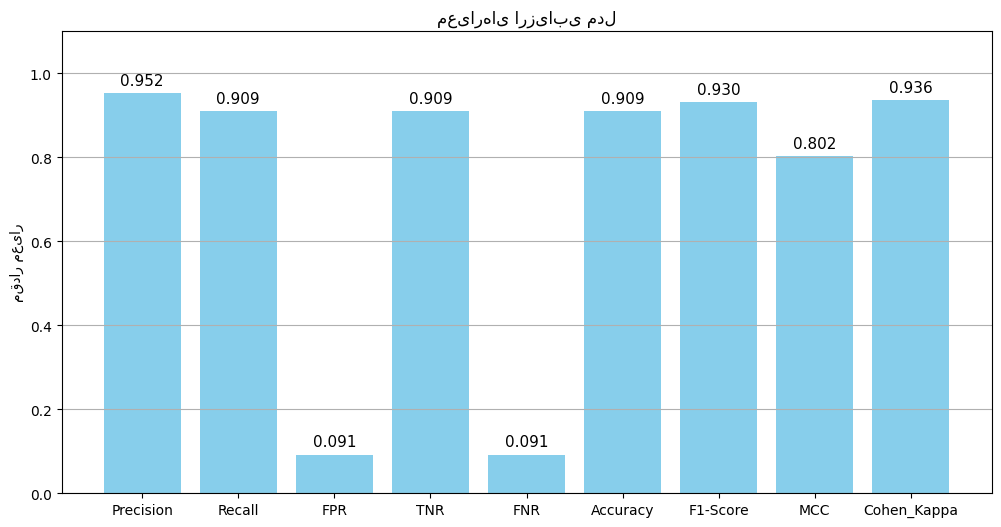

In [54]:
def plot_metrics(metrics_dict):
    names = list(metrics_dict.keys())
    values = list(metrics_dict.values())

    plt.figure(figsize=(12,6))
    bars = plt.bar(names, values, color='skyblue')
    plt.ylim(0,1.1)
    plt.title("ŸÖÿπ€åÿßÿ±Ÿáÿß€å ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ")
    plt.ylabel("ŸÖŸÇÿØÿßÿ± ŸÖÿπ€åÿßÿ±")
    plt.grid(axis='y')

    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{val:.3f}",
                 ha='center', fontsize=11)

    plt.show()

plot_metrics(metrics)


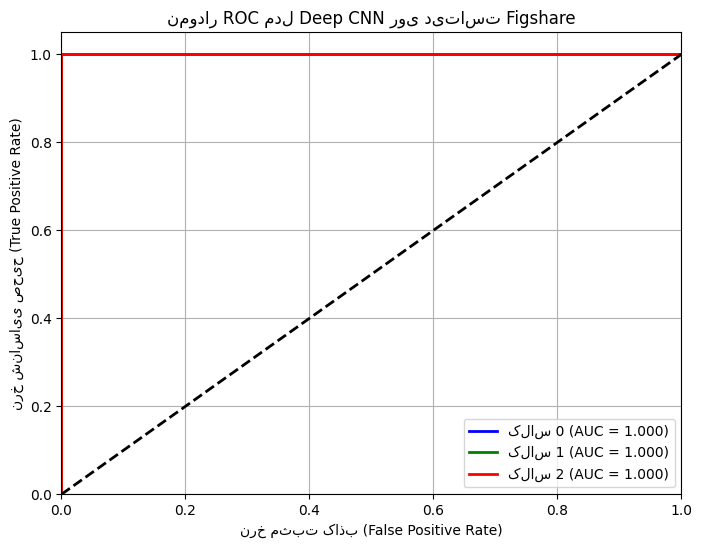

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# ŸÅÿ±ÿ∂ ⁄©ŸÜ€åÿØ y_true Ÿà y_scores ÿ±ÿß ÿØÿßÿ±€åÿØ:
# y_true: ÿ¢ÿ±ÿß€åŸá ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ÿßÿµŸÑ€åÿå ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿßÿπÿØÿßÿØ ÿµÿ≠€åÿ≠ ÿßÿ≤ 0 ÿ™ÿß n_classes-1
# y_scores: ÿ¢ÿ±ÿß€åŸá Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿßÿ≠ÿ™ŸÖÿßŸÑ Ÿáÿ± ⁄©ŸÑÿßÿ≥ ÿ®ÿß ÿßÿ®ÿπÿßÿØ (n_samples, n_classes)

# ŸÖÿ´ÿßŸÑ ŸÅÿ±ÿ∂€å (ÿ®ÿß€åÿØ ÿ®ÿß ÿØÿßÿØŸá ŸàÿßŸÇÿπ€å ÿ¥ŸÖÿß ÿ¨ÿß€å⁄Øÿ≤€åŸÜ ÿ¥ŸàÿØ)
y_true = np.array([0, 2, 1, 2, 0, 1])  # ŸÜŸÖŸàŸÜŸá ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å (3 ⁄©ŸÑÿßÿ≥: 0,1,2)
y_scores = np.array([
    [0.9, 0.05, 0.05],
    [0.1, 0.1, 0.8],
    [0.2, 0.7, 0.1],
    [0.05, 0.1, 0.85],
    [0.88, 0.07, 0.05],
    [0.1, 0.8, 0.1]
])  # ÿßÿ≠ÿ™ŸÖÿßŸÑ‚ÄåŸáÿß€å Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ¥ÿØŸá ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ŸÑÿßÿ≥

# ÿ™ÿπÿØÿßÿØ ⁄©ŸÑÿßÿ≥‚ÄåŸáÿß
n_classes = y_scores.shape[1]

# ÿ®ÿß€åŸÜÿ±€å ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß (ÿ®ÿ±ÿß€å ROC ⁄ÜŸÜÿØ⁄©ŸÑÿßÿ≥Ÿá)
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# ÿ±ÿ≥ŸÖ ROC ÿ®ÿ±ÿß€å Ÿáÿ± ⁄©ŸÑÿßÿ≥
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'⁄©ŸÑÿßÿ≥ {i} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # ÿÆÿ∑ ŸÇÿ∑ÿ±€å
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('ŸÜÿ±ÿÆ ŸÖÿ´ÿ®ÿ™ ⁄©ÿßÿ∞ÿ® (False Positive Rate)')
plt.ylabel('ŸÜÿ±ÿÆ ÿ¥ŸÜÿßÿ≥ÿß€å€å ÿµÿ≠€åÿ≠ (True Positive Rate)')
plt.title("ŸÜŸÖŸàÿØÿßÿ± ROC ŸÖÿØŸÑ Deep CNN ÿ±Ÿà€å ÿØ€åÿ™ÿßÿ≥ÿ™ Figshare")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
